# Dataset: Whole-brain neural recordings of freely moving C. elegans

In [1]:
import h5py
import numpy as np

from datetime import datetime, tzinfo, timedelta
from dateutil.tz import tzlocal

import os
from os import environ

import matplotlib.pyplot as plt
%matplotlib inline 

import pynwb

## Overview of all data sets

(From https://osf.io/mw5zs/wiki/home/) 
### Input dataset structure
##### Neurons
+ ActivityFull
+ Positions
+ Time
+ GreenRaw
+ RedRaw

##### goodVolumes

##### Behavior
+ Eigenworm1
+ Eigenworm3
+ Eigenworm2
+ CMSVelocity
+ Ethogram
> Shows animal behavior, a categorical numeric variable representing: reverse, turn, forward, and pause 
+ AngleVelocity
+ EthogramFull
+ X
+ Y
+ Theta

##### CL

### Output dataset structure
among others contains

+ PCA of neural activity
+ LASSO and Elastic net models
+ Autocorrelation of neural activity

In [2]:
try:
    # if running build.py
    filenames = ['AML18_moving.hdf5','AML175_moving.hdf5', 'AML32_moving.hdf5']
    
    
    file_number = int(environ['file_number'])
    filename = environ['filename']
    exp_number = int(environ['experiment_number'])
    experiment = environ['experiment']
    
    
    celegans_h5 = h5py.File(filename, 'r')
    
    save_nwb = True
    show_plots = True
    
except:
    # default values if viewing Notebook
    filenames = ['AML18_moving.hdf5'] # there are a lot of different data types, show only 1
    
    file_number = 0
    filename = filenames[file_number]
    
    celegans_h5 = h5py.File(filename, 'r')

    # get experiments
    experiments  = np.array(celegans_h5['/'])
    num_experiments = len(experiments)
    exp_number = 0
    experiment = experiments[exp_number]
    
    save_nwb = False
    show_plots = True
    
save_plots = True



 ** Examining experiment: BrainScanner20160506_155051 from AML18_moving.hdf5 **
 ** Examining experiment: BrainScanner20160506_160928 from AML18_moving.hdf5 **


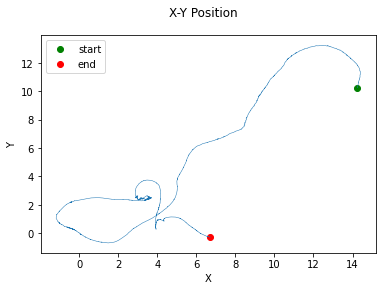

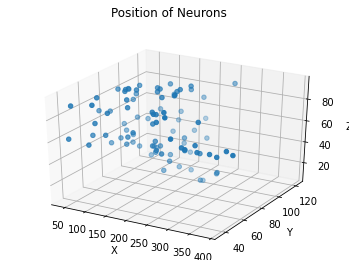

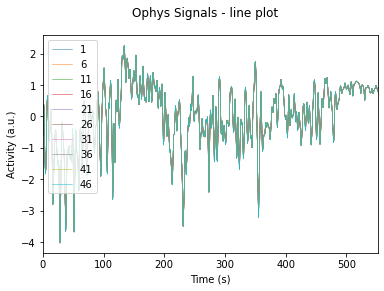

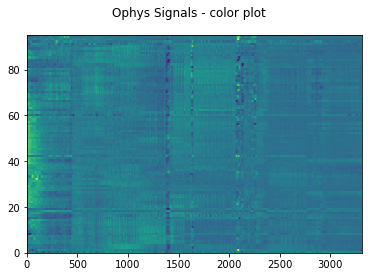

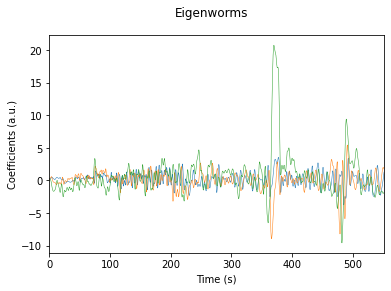

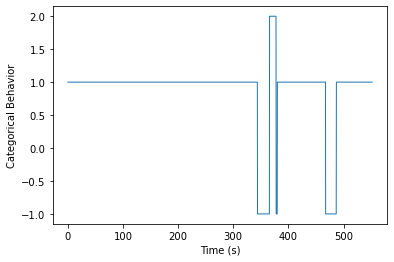

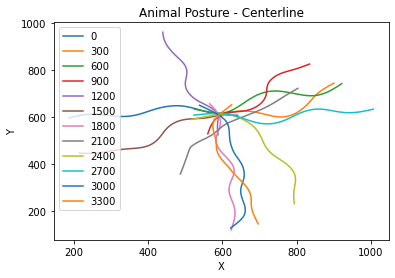

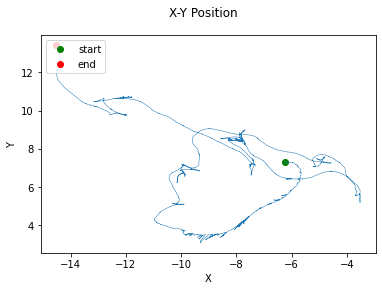

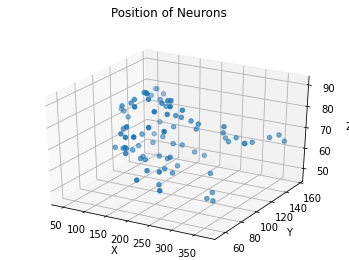

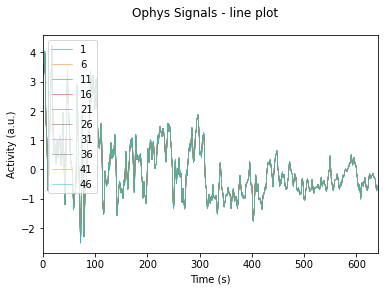

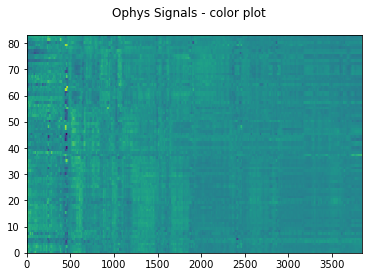

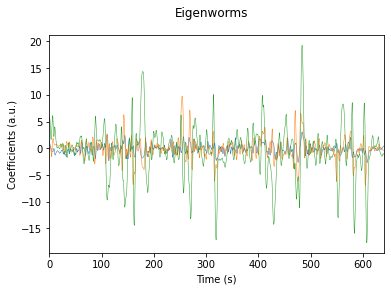

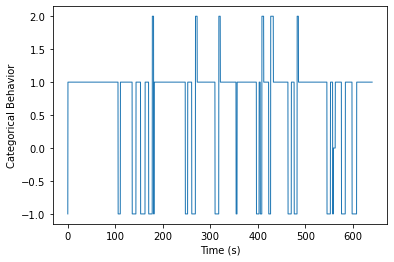

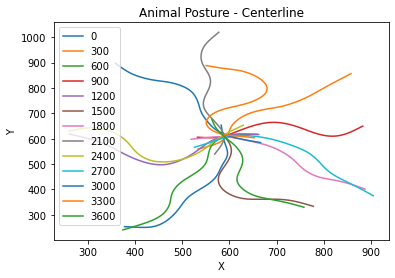

In [3]:
if show_plots:
        
    i = file_number
    ex_celegans_h5 = h5py.File(filename, 'r')

    j = exp_number
    exp = experiment

    print(' ** Examining experiment: %s from %s **'%(exp,filename))
    ns = np.array(ex_celegans_h5['/%s/Neurons'%exp])
    behas = np.array(ex_celegans_h5['/%s/Behavior'%exp])
    
    
    ## body position ##
    xs = np.array(ex_celegans_h5['/%s/Behavior/X'%exp])
    ys = np.array(ex_celegans_h5['/%s/Behavior/Y'%exp])

    fig = plt.figure()
    plt.plot([xs[0]], [ys[0]], lw=0, marker='o',color='green',label='start')
    plt.plot([xs[-1]], [ys[-1]], lw=0, marker='o',color='red',label='end')
    plt.plot(xs, ys, lw=.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.suptitle('X-Y Position')
    plt.legend(loc='upper left')

    if not save_plots:
        plt.show()

    else:
        fig_name = 'Scholz_%s_%s_body_xy.png'%(str(i),str(j))
        fig_file = os.path.join('images',fig_name)
        fig.savefig(fig_file,bbox_inches='tight')    



    ## neuron positions ##
    positions = np.array(ex_celegans_h5['/%s/Neurons/Positions'%exp])
    #print positions
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(positions[0],positions[1],positions[2])
    ax.set_aspect('auto')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.suptitle('Position of Neurons')

    if not save_plots:
        plt.show()

    else:
        fig_name = 'Scholz_%s_%s_neuron_xyz.png'%(str(i),str(j))
        fig_file = os.path.join('images',fig_name)
        fig.savefig(fig_file,bbox_inches='tight')  




    ## Physiological data ###
    fig = plt.figure()
    activity = np.array(ex_celegans_h5['/%s/Neurons/Activity'%exp])
    times = np.array(ex_celegans_h5['/%s/Neurons/Time'%exp])

    # line plots
    for k in range(1, 50,5):
        plt.plot(times, activity[i], lw=.5, label='%s'%k)
        plt.xlim([times[0],times[-1]])

    plt.xlabel('Time (s)')
    plt.ylabel('Activity (a.u.)')

    plt.suptitle('Ophys Signals - line plot')
    plt.legend(loc='upper left')

    # color plot version
    hm_fig, hm_ax = plt.subplots()
    hm_ax.pcolormesh(activity)
    hm_fig.suptitle('Ophys Signals - color plot')

    if not save_plots:
        plt.show()

    else:
        fig_name = 'Scholz_%s_%s_ophys.png'%(str(i),str(j))
        fig_file = os.path.join('images',fig_name)
        fig.savefig(fig_file,bbox_inches='tight')  



    ## PCA data ##
    ew1 = np.array(ex_celegans_h5['/%s/Behavior/Eigenworm1'%exp])
    ew2 = np.array(ex_celegans_h5['/%s/Behavior/Eigenworm2'%exp])
    ew3 = np.array(ex_celegans_h5['/%s/Behavior/Eigenworm3'%exp])

    fig = plt.figure()

    plt.plot(times, ew1, lw=.5)
    plt.plot(times, ew2, lw=.5)
    plt.plot(times, ew3, lw=.5)
    plt.xlim([times[0],times[-1]])
    plt.suptitle('Eigenworms')

    plt.xlabel('Time (s)')
    plt.ylabel('Coefficients (a.u.)')

    if not save_plots:
        plt.show()

    else:
        fig_name = 'Scholz_%s_%s_eigenworms.png'%(str(i),str(j))
        fig_file = os.path.join('images',fig_name)
        fig.savefig(fig_file,bbox_inches='tight')  

    ## Ethograms ##
    eth = np.array(ex_celegans_h5['/%s/Behavior/Ethogram'%exp])
    ethFull = np.array(ex_celegans_h5['/%s/Behavior/EthogramFull'%exp])

    fig = plt.figure()
    plt.plot(times, eth, lw=1)

    plt.suptitle('Ethogram of Behavior')
    plt.xlabel('Time (s)')
    plt.ylabel('Categorical Behavior')

    if not save_plots:
        plt.show()

    else:
        fig_name = 'Scholz_%s_%s_ethogram.png'%(str(i),str(j))
        fig_file = os.path.join('images',fig_name)
        fig.savefig(fig_file,bbox_inches='tight')  


    ## Center lines ##
    good_volumes = np.array(ex_celegans_h5['/%s/goodVolumes'%exp])
    center_lines = np.array(ex_celegans_h5['/%s/CL'%exp])
#             print(np.shape(center_lines)) # frames X x-coord X y-coord

    fig = plt.figure()
    for frame in range(len(good_volumes)):

        # only plot every 100
        if frame%300==0:
            x, y = center_lines[frame,:,0], center_lines[frame,:,1]
            plt.plot(x,y,label='%s'%frame)


    plt.title('Animal Posture - Centerline')
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('Y')

    if not save_plots:
        plt.show()

    else:
        fig_name = 'Scholz_%s_%s_centerline.png'%(str(i),str(j))
        fig_file = os.path.join('images',fig_name)
        fig.savefig(fig_file,bbox_inches='tight')  


## Global variables

In [4]:
# Dataset structure
comments = ('Extracted from: %s, '
            'Datasets are provided in hdf5 format. '
            'Each dataset has two files, containing '
            'the raw data and a results file containing '
            'analysis and models.')%filename

In [5]:
# date and time information
create_date = datetime.now(tz=tzlocal()) 

session = experiment.split('BrainScanner')[1]
date, time = session.split('_')[0], session.split('_')[1]

year, month, day = int(date[:4]), int(date[4:6]), int(date[6:])
hour, minute, sec = int(time[:2])%12, int(time[2:4]), int(time[4:])

# for Princeton, NJ, US
class TZ(tzinfo):
    def utcoffset(self, dt):
        return -timedelta(hours=4)
    def dst(self, dt):
        return timedelta(1) # 0 if not DST, 1 if DST
    def tzname(self,dt):
        return "-04:00"
    def  __repr__(self):
        return f"{self.__class__.__name__}()"
    
start_time = datetime(year,month,day,hour,minute,sec,tzinfo=TZ())



In [6]:
main_ref = 'Scholz et al. 2018 dataset: %s taken from file %s'%(experiment,filename)
nwbfile = pynwb.NWBFile(main_ref, 
              experiment, 
              start_time,
              file_create_date=create_date,
              notes='NWB file created with pynwb v%s'%pynwb.__version__,
              experimenter='Monika Scholz',
              experiment_description='Whole-brain neural recordings of freely moving C. elegans',
              institution='Princeton University',
              related_publications='Predicting natural behavior from whole-brain neural dynamics, Monika Scholz, Ashley N Linder, Francesco Randi, Anuj K Sharma, Xinwei Yu, Joshua W Shaevitz, Andrew M Leifer, bioRxiv 445643; doi: https://doi.org/10.1101/445643',
              lab='Leifer lab, https://pni.princeton.edu/faculty/andrew-leifer',
                       
              protocol=('Animals were imaged on the whole brain imager, which simultaneously '
                      'records four video streams to image calcium activity of body posture. '
                      'Recording specs: 10x magnification darkfield image, 10x fluorescence '
                      'image of fluorescent brain for tracking, 40x image each of tag (RFP and GCaMP6s/GFP) '
                      '10x images recorded at 50 frames/s, neural dynamics recorded with 200 slices/s, '
                      'acquisition rate of 6 volumes/s.')
            )



In [7]:
# subject-related elements
species = 'Caenorhabditis elegans'

genotype = 'wtfIs5[Prab-3::NLS::GCaMP6s; Prab-3::NLS::tagRFP]' if 'AML32' in filename else \
               ('wtfIs3[Prab-3::NLS::GFP, Prab-3::NLS::tagRFP]' if 'AML18' in filename else \
                ('lite-1(ce314)X; wtfIs5[Prab-3::NLS::GCaMP6s; Prab-3::NLS::tagRFP]' if 'AML70' in filename else \
                ('lite-1(ce314)X; wtfIs3[Prab-3::NLS::GFP; Prab-3::NLS::tagRFP] ' if 'AML175' in filename else '???')))

subject = pynwb.file.Subject(
    species = species,
    genotype=genotype,
)



## Data Fields

## Import Custom Extensions for Leifer Lab

In [9]:
from pynwb import load_namespaces, get_class

ns_path = "leiferlab.namespace.yaml"
ext_source = "leiferlab.extensions.yaml"

# load the created namespace
load_namespaces(ns_path)


{'leiferlab': {'core': ('NWBDataInterface', 'TimeSeries', 'SpatialSeries')}}

In [10]:
# autogenerate the new extensions
ResponseSeries = get_class('ResponseSeries','leiferlab')
NeuronPositionTable = get_class('NeuronPositionTable','leiferlab')
ChannelGroup = get_class('ChannelGroup','leiferlab')
CenterlineSeries = get_class('CenterlineSeries','leiferlab')


## Neuron data fields

In [11]:
#### Neural data - has a NWB data object/extension and description ####
green_raw = np.array(celegans_h5['/%s/Neurons/GreenRaw'%experiment])
positions = np.array(celegans_h5['/%s/Neurons/Positions'%experiment])
red_raw = np.array(celegans_h5['/%s/Neurons/RedRaw'%experiment])
time = np.array(celegans_h5['/%s/Neurons/Time'%experiment])
time_full = np.array(celegans_h5['/%s/Neurons/TimeFull'%experiment])
ordering = np.array(celegans_h5['/%s/Neurons/ordering'%experiment])
activity = np.array(celegans_h5['/%s/Neurons/Activity'%experiment])
activity_full = np.array(celegans_h5['/%s/Neurons/ActivityFull'%experiment])
raw_activity = np.array(celegans_h5['/%s/Neurons/RawActivity'%experiment])

#### Neural data included - has a NWB data object/extension but does not have adequate description ####
ratio = np.array(celegans_h5['/%s/Neurons/Ratio'%experiment])
deconv_activity = np.array(celegans_h5['/%s/Neurons/deconvolvedActivity'%experiment])
deriv_activity = np.array(celegans_h5['/%s/Neurons/derivActivity'%experiment])

#### Neural data included - not necessary ####
# indices = np.array(celegans_h5['/%s/Neurons/Indices'%experiment]) 
# orientation = np.array(celegans_h5['/%s/Neurons/orientation'%experiment])
# valid = np.array(celegans_h5['/%s/Neurons/valid'%experiment])



### NWB Ophys components

In [12]:
from pynwb.ophys import OpticalChannel
from pynwb.device import Device



In [13]:
device = nwbfile.create_device(name='imaging_device',
                            description='unspecified',
                            manufacturer='unspecified'
            )


optical_channel_1 = OpticalChannel(name='optical_channel_01', 
                                 description='red channel for calcium insensitive fluorophore, RFP', 
                                 # not correct lambda. unspecified but required field
                                 emission_lambda=500.) 

indicator = 'GFP' if 'GFP' in genotype else 'GCaMP6s'

optical_channel_2 = OpticalChannel(name='optical_channel_02', 
                                 description='green channel for calcium indicator, %s'%indicator, 
                                 # not correct lambda. unspecified but required field  
                                 emission_lambda=900.) 



In [14]:
channel_group = ChannelGroup(name='optical_channel_group',
                            description='Multiple channels used on same imaging device',
                            device=device,
                            red_optical_channel=optical_channel_1,
                            green_optical_channel=optical_channel_2)



In [15]:
try:
    nwbfile.create_processing_module(
        name='devices',
        description='Additional optical channels associated with Device object'
    )
       
except ValueError:
    nwbfile.processing.pop('devices')
    
    nwbfile.create_processing_module(
        name='devices',
        description='Additional optical channels associated with Device object'
    )
    

# add channels (avoids BrokenLink error) and channel group 
nwbfile.processing['devices'].add([optical_channel_1,optical_channel_2])
nwbfile.processing['devices'].add(channel_group)



optical_channel_group abc.ChannelGroup at 0x139927763267984
Fields:
  description: Multiple channels used on same imaging device
  device: imaging_device pynwb.device.Device at 0x139927762763856
  green_optical_channel: optical_channel_02 pynwb.ophys.OpticalChannel at 0x139927762767696
Fields:
  description: green channel for calcium indicator, GFP
  emission_lambda: 900.0

  red_optical_channel: optical_channel_01 pynwb.ophys.OpticalChannel at 0x139927762765200
Fields:
  description: red channel for calcium insensitive fluorophore, RFP
  emission_lambda: 500.0


In [16]:
pos_table = NeuronPositionTable(name='NeuronPositionTable',
                    description='Table containing all neuron IDs and their xyz-coordinates',
                   neuron_id=ordering,
                   x_pos=positions[0],
                   y_pos=positions[1],
                   z_pos=positions[2]) 



In [17]:
try:
    nwbfile.create_processing_module(
        name='neuron_positions',
        description='Extracted physical positions of neurons'
    )
       
except ValueError:
    nwbfile.processing.pop('neuron_positions')
    
    nwbfile.create_processing_module(
        name='neuron_positions',
        description='Extracted physical positions of neurons'
    )
    

nwbfile.processing['neuron_positions'].add(pos_table)



NeuronPositionTable abc.NeuronPositionTable at 0x139927763270416
Fields:
  description: Table containing all neuron IDs and their xyz-coordinates
  neuron_id: [79 64 85 86 51 50  9 70 36 47 18 62 40 81 14  0 42 76 48  2 63 54 69 33
 60 31 16  4 66 26 23 21 89 56 73 78 19  1 80 29 28 13 65 90 77  5  6 11
 34 30 87 20 91  3 44 32 27 24 41 83 71 12 94 57 46 10 52 22 59 92 17 38
 72 35 67 82 53 25 49 93 58 55 61 74 84 45 15 37  8 39  7 68 88 75 43]
  x_pos: [104.74       103.30656934  89.7        199.91289199 147.5308642
 147.86585366 185.02990033 208.25910931 299.14642857  93.06024096
  88.65454545  85.89217759  41.23636364 183.26506024 191.42424514
 181.07017544  92.94252874 203.41911765 120.66123188 279.03852915
 115.40104167 256.97717842 329.74636175 142.03571429 347.71850394
 116.06861499 366.56751825 185.55189456 185.90243902 292.61656135
 383.96666667 181.77272727 196.44864865 173.99625468 213.70034843
 122.64705882 261.4         43.18771331 121.70454545 103.0113852
 101.90573013 18

In [18]:
these_responses = green_raw
sorted_order = np.argsort(ordering)


for neuron_num in sorted_order:
    neuron_id = ordering[neuron_num] + 1

    # padded labels
    label_num = '0'+str(neuron_id) if neuron_id<10 else str(neuron_id)


    rs = ResponseSeries(name='GreenFluorescence_'+label_num,
                  neuron_id=neuron_id,
                  description=('Neuron %i, data were collected using ' 
                               'the green optical channel in documentation')%neuron_id,

                   data=these_responses[neuron_num,:],
                   timestamps=time_full,
                   unit='lumens',

                   optical_channel=optical_channel_2,
#                    optical_channel='green_optical_channel',

                   comments=comments,)

    # Update NWB File
    nwbfile.add_acquisition(rs)
    
    

In [19]:
these_responses = red_raw
sorted_order = np.argsort(ordering)


for neuron_num in sorted_order:
    neuron_id = ordering[neuron_num] + 1

    # padded labels
    label_num = '0'+str(neuron_id) if neuron_id<10 else str(neuron_id)


    rs = ResponseSeries(name='RedFluorescence_'+label_num,
                  neuron_id=neuron_id,
                  description=('Neuron %i, data were collected using ' 
                               'the red optical channel in documentation')%neuron_id,

                   data=these_responses[neuron_num,:],
                   timestamps=time_full,
                   unit='lumens',
                        
                   optical_channel=optical_channel_1,
#                    optical_channel='red_optical_channel',

                   comments=comments,)

    # Update NWB File
    nwbfile.add_acquisition(rs)
    
    

In [20]:
these_responses = activity_full
sorted_order = np.argsort(ordering)
    
try:
    nwbfile.create_processing_module(
        name='neural_activity',
        description='Extracted/computed neural activity'
    )
       
except ValueError:
    nwbfile.processing.pop('neural_activity')
    
    nwbfile.create_processing_module(
        name='neural_activity',
        description='Extracted/computed neural activity'
    )
    

for neuron_num in sorted_order:
    neuron_id = ordering[neuron_num] + 1

    # padded labels
    label_num = '0'+str(neuron_id) if neuron_id<10 else str(neuron_id)
    warn = 'WARNING: No description of data is provided in documentation. '


    rs = ResponseSeries(name='FullActivity_'+label_num,
                  neuron_id=neuron_id,
                  description='Neuron %i'%neuron_id,

                   data=these_responses[neuron_num,:],
                   timestamps=time_full,
                   unit='unspecified',
                        

                   comments=warn+comments,)

    # Update NWB File
    nwbfile.processing['neural_activity'].add(rs)
    
    

In [21]:
these_responses = activity_full
sorted_order = np.argsort(ordering)
    

for neuron_num in sorted_order:
    neuron_id = ordering[neuron_num] + 1

    # padded labels
    label_num = '0'+str(neuron_id) if neuron_id<10 else str(neuron_id)
    warn = 'WARNING: No description of data is provided in documentation. '

    rs = ResponseSeries(name='RawActivity_'+label_num,
                  neuron_id=neuron_id,
                  description='Neuron %i'%neuron_id,

                   data=these_responses[neuron_num,:],
                   timestamps=time_full,
                   unit='unspecified',
                        

                   comments=warn+comments,)

    # Update NWB File
    nwbfile.processing['neural_activity'].add(rs)
    
    

In [22]:
these_responses = deconv_activity
sorted_order = np.argsort(ordering)
    

for neuron_num in sorted_order:
    neuron_id = ordering[neuron_num] + 1

    # padded labels
    label_num = '0'+str(neuron_id) if neuron_id<10 else str(neuron_id)
    warn = 'WARNING: No description of data is provided in documentation. '

    rs = ResponseSeries(name='DeconvActivity_'+label_num,
                  neuron_id=neuron_id,
                  description='Neuron %i'%neuron_id,

                   data=these_responses[neuron_num,:],
                   timestamps=time,
                   unit='lumens',
                        

                   comments=warn+comments,)

    # Update NWB File
    nwbfile.processing['neural_activity'].add(rs)
    
    

In [23]:
these_responses = deriv_activity
sorted_order = np.argsort(ordering)
    

for neuron_num in sorted_order:
    neuron_id = ordering[neuron_num] + 1

    # padded labels
    label_num = '0'+str(neuron_id) if neuron_id<10 else str(neuron_id)
    warn = 'WARNING: No description of data is provided in documentation. '

    rs = ResponseSeries(name='DerivActivity_'+label_num,
                  neuron_id=neuron_id,
                  description='Neuron %i'%neuron_id,

                   data=these_responses[neuron_num,:],
                   timestamps=time,
                   unit='lumens',
                    

                   comments=warn+comments,)

    # Update NWB File
    nwbfile.processing['neural_activity'].add(rs)
    
    

## NWB Behavior components

In [24]:
from pynwb.behavior import Position, BehavioralEvents, BehavioralTimeSeries
from pynwb.misc import AbstractFeatureSeries
from pynwb.base import TimeSeries

In [25]:
# BehavioralTimeseries
angle_velo = np.array(celegans_h5['/%s/Behavior/AngleVelocity'%experiment])
cms_velo = np.array(celegans_h5['/%s/Behavior/CMSVelocity'%experiment])

# AbstractFeatureSeries
ew1 = np.array(celegans_h5['/%s/Behavior/Eigenworm1'%experiment])
ew2 = np.array(celegans_h5['/%s/Behavior/Eigenworm2'%experiment])
ew3 = np.array(celegans_h5['/%s/Behavior/Eigenworm3'%experiment])
theta = np.array(celegans_h5['/%s/Behavior/Theta'%experiment])

# BehavioralEvents
ethogram = np.array(celegans_h5['/%s/Behavior/Ethogram'%experiment])
ethogram_full = np.array(celegans_h5['/%s/Behavior/EthogramFull'%experiment])

# Position
x = np.array(celegans_h5['/%s/Behavior/X'%experiment])
y = np.array(celegans_h5['/%s/Behavior/Y'%experiment])



In [26]:
try:
    nwbfile.create_processing_module(
        name='behavior',
        description='Extracted/computed results for behavioral activity'
    )
       
except ValueError:
    nwbfile.processing.pop('behavior')
    
    nwbfile.create_processing_module(
        name='behavior',
        description='Extracted/computed results for behavioral activity'
    )
    
    

In [27]:
# add positional data
pos = Position()
warn = "WARNING: No 'unit' field, but specified in Jupyter widgets as 'meters'. " 

data = np.squeeze(np.array([x.T,y.T]).T)

ss = pos.create_spatial_series(
        name='BodyPositionSeries',
        data=data,
        reference_frame='origin=(0,0)',
        timestamps=time,
        comments=warn+comments,
    )
    
nwbfile.processing['behavior'].add(pos)



Position pynwb.behavior.Position at 0x139927762161296
Fields:
  spatial_series: {
    BodyPositionSeries <class 'pynwb.behavior.SpatialSeries'>
  }

In [28]:
good_volumes = np.array(celegans_h5['/%s/goodVolumes'%experiment])
center_lines = np.array(celegans_h5['/%s/CL'%experiment])


In [29]:
_, num_coords, _ = np.shape(center_lines)
    
for coord in range(num_coords):
    
    these_lines = center_lines[:,coord,:]
    coord_id = coord+1
    
    xs = these_lines[:,0]
    ys = these_lines[:,1]
    
    data = np.squeeze(np.array([xs.T,ys.T]).T)
    
    
    # padded labels
    if coord_id<100:
        label_num = '00'+str(coord_id) if coord_id<10 else '0'+str(coord_id)
    else:
        label_num = str(coord_id)
        
    warn = 'WARNING: No description of coordinate map is provided in documentation. '

    cl = CenterlineSeries(name='CenterlineSeries_'+label_num,
                  coord_id=coord_id,
                   description=('Coordinate %i, '
                               'Posture extracted ysing an active contour fit on the frames '
                               'of the 10x behavior recordings. The fit finds 100 xy-coords '
                               'for each frame describing the centerline.')%coord_id,
                   data=data,
                   timestamps=time,
                   reference_frame=warn,
                   comments=comments)

    #Update NWB File
    nwbfile.processing['behavior'].add(cl)
    
    

In [30]:
try:
    nwbfile.create_processing_module(
        name='behavior_posture',
        description='Results of postural analysis'
    )
       
except ValueError:
    nwbfile.processing.pop('behavior_posture')
    
    nwbfile.create_processing_module(
        name='behavior_posture',
        description='Results of postural analysis'
    )
    
    

In [31]:
# add postural analysis elements
eigenworms = [ew1,ew2,ew3]
labels = ['EigenwormSeries_01','EigenwormSeries_02','EigenwormSeries_03']
description = ('Results of PCA-based eigenworm postural analysis, '
              'Relative angles were computed for extracted '
              'centerlines and subjected to dimensional '
              'reduction to form a basis set of eigenworms '
              'describing the postural variation of the centerlines')

features = ['coeff_0%s'%(i+1) if i+1<=9
           else 'coeff_%s'%(i+1) for i in range(len(ew1))]
feature_units = ['a.u.' for i in range(len(ew1))]

for i, (data, label) in enumerate(zip(eigenworms,labels)):
    
    ew = AbstractFeatureSeries(name=label,
                              features=features,
                              feature_units=feature_units,
                              data=data,
                              timestamps=time,
                              description=description)
    
    nwbfile.processing['behavior_posture'].add(ew)


description = ('The first two eigenworms describe body bends '
              'during sinusoidal locomotion. The phase of the body '
              '(ThetaSeries) is derived from the coefficients for '
              'the projection of the centerlines onto the first '
              'two eigenworms.')

features = ['ratio_0%s'%(i+1) if i+1<=9
           else 'ratio_%s'%(i+1) for i in range(len(theta))]
feature_units = ['arbitrary' for i in range(len(theta))]

# add phase of body    
th = AbstractFeatureSeries(name='ThetaSeries',
                              features=features,
                              feature_units=feature_units,
                              data=data,
                              timestamps=time,
                              description=description) 

nwbfile.processing['behavior_posture'].add(th)


description = ('The derivative of theta is referred to as the phase velocity '
              'that describes the speed of bend propagation,' 
               'approx center-of-mass velocity specifying either moving '
               'forward (+) or in reverse (-). Gaussian filtered with '
              'derivative filter of width 3s')
warn = 'WARNING: Correspondence to description need to be confirmed. '

# add derived velocity vectors
ts1 = TimeSeries(name='CMSVelocitySeries',
               data=cms_velo,
               timestamps=time,
              unit='rad/s',
               description=description,
                comments=warn+comments)

bts1 = BehavioralTimeSeries(name='BehavioralTimeSeries_01',
                           time_series=ts1)

nwbfile.processing['behavior_posture'].add(bts1)




description = ('The third eigenworm coefficient corresponds to the body curvature, '
               'and is related to turning, the sign describes the bend direction. '
              'Gaussian filtered with derivative filter of width 1s')
warn = 'WARNING: Correspondence to description need to be confirmed. '

ts2 = TimeSeries(name='AngleVelocitySeries',
               data=angle_velo,
               timestamps=time,
              unit='a.u.',
               description=description,
                comments=warn+comments)

bts2 = BehavioralTimeSeries(name='BehavioralTimeSeries_02',
                           time_series=ts2)

nwbfile.processing['behavior_posture'].add(bts2)


# add ethograms - summary of the above
ethos = [ethogram, ethogram_full]
times = [time,time_full]
labels = ['','_Full']
description = ('Summary results describing whether the worm is '
              'moving forward (1), in reverse (-1), turning (2), or in rest (0)')
warn = 'WARNING: Values in description for direction need to be confirmed.'

for i, (data, t, label) in enumerate(zip(ethos,times,labels)):
    
    time_series = TimeSeries(name='Ethogram%s'%label,
                            data=data,
                              timestamps=t,
                              description=description,
                             unit='categorical',
                            comments=warn+comments)
    
    eth = BehavioralEvents(name='BehavioralEvents_0%s'%(i+1),
                           time_series=time_series) 

    nwbfile.processing['behavior_posture'].add(eth)
    
    

In [32]:
if save_nwb:
    nwb_file_name = 'ScholzEtAl2019_%s_%s.nwb'%(filename.split('.')[0],experiment)


    io = pynwb.NWBHDF5IO(nwb_file_name, mode='w',
                        extensions=ns_path)# include extension namespace path in NWB file
    io.write(nwbfile)
    io.close()
    print("%s"%nwb_file_name)
    
    